# Na aula anterior...

Por que faria sentido parar de quebrar as bases de uma árvore de decisão se a folha não está pura? 

overfit acontece
    acurácia treino: 89%
    acurácia teste : 54%

Além das features da instância que eu estou prevendo, o que mais é necessário para fazer a previsão em uma árvore de decisão?

# Lembretes

Exercício no Class!

# Hoje!

## Árvores

### Continuando árvores...

In [35]:
import numpy as np

def calcula_entropia_p(p1):
    
    if p1 == 0 or p1 == 1:
        return 0
    
    p2 = 1 - p1    
    
    return -(p1 * np.log2(p1) + (p2) * np.log2(p2))


def calcula_entropia(serie):
    return calcula_entropia_p(serie.value_counts(normalize = True).iloc[0])
    
    
def calcula_ganho_informacao(df, var_resp, var_quebra, vlr_quebra):
    ei = calcula_entropia(df[var_resp])
    
    conj1 = df[df[var_quebra] == vlr_quebra]
    conj2 = df[df[var_quebra] != vlr_quebra]
    
    e1 = calcula_entropia(conj1[var_resp])
    e2 = calcula_entropia(conj2[var_resp])
    
    ef = (e1 * len(conj1) + e2 * len(conj2)) / len(df)
    
    return ei - ef

**Para pensar:** Como um nó de uma árvore é construído? A partir de `df_amostra`, construa uma função que escolhe a melhor feature e valor para quebra e divida o conjunto de dados em dois.

In [25]:
import pandas as pd

df = pd.read_csv("dados/titanic.csv")

df_amostra = df.sample(15, random_state = 1)

In [37]:
# Exemplo de como calcular o ganho de informação para todas os possíveis 
# valores de uma feature 

expl_temp = 'Sex'
target = 'Survived'

valores_possiveis = df_amostra[expl_temp].unique()

for v in valores_possiveis:
    
    gi = calcula_ganho_informacao(df_amostra, target, expl_temp, v)
    
    print(gi)

0.430776632270099
0.430776632270099


In [ ]:
def escolhe_quebra(tabela, target):
    
    # TODO
    
    return feature, valor, filho_e, filho_d

**Para pensar:** Como ficam a questão da escolha do valor para features contínuas?

Vai quebrar em maior/menor que um determinado, sempre olhando o "meio".

**Para pensar:** Quando a variável resposta é contínua, podemos utilizar a entropia para calcular pureza?

**Para pensar:** No KNN e em regressões linear/contínua, é importante que as features estejam numa determinada escala. Nos casos de uma árvore de decisão, isso também é importante?

### Usando o sklearn

**Para pensar:** O seguinte trecho de código faz a previsão de classificação usando 5 features do titanic com o algoritmo KNN. 

1. ~Rode o código, você verá que dará alguns erros. Sua primeira task é corrigir esses erros.~
2. ~Adapte o código alterando o algoritmo para Árvores de Decisão.~

In [71]:
# Antes

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('dados/titanic.csv')

var_expl = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
var_resp = 'Survived'

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl]
x_teste = df_teste[var_expl]

y_treino = df_treino[var_resp]
y_teste = df_teste[var_resp]

print('treino:', x_treino.shape, y_treino.shape)
print('teste:', x_teste.shape, y_teste.shape)

modelo = KNeighborsClassifier()
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict_proba(x_teste)

roc_auc_score(y_teste, y_teste_pred)

In [79]:
# Depois

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import roc_auc_score

df = pd.read_csv('dados/titanic.csv')

var_expl = ['Pclass', 'Sex', 'SibSp', 'Parch']
var_resp = 'Survived'

# uma forma de corrigir o problema do Sex => male/female
# df['Sex'] = df['Sex'] == 'male'

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl].copy()
x_teste = df_teste[var_expl].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

# uma outra forma de corrigir o problema do Sex => male/female
oe = OrdinalEncoder()
x_treino[var_expl] = oe.fit_transform(x_treino[var_expl])
x_teste[var_expl] = oe.transform(x_teste[var_expl])

print('treino:', x_treino.shape, y_treino.shape)
print('teste:', x_teste.shape, y_teste.shape)

modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict_proba(x_teste)[:, 1]

roc_auc_score(y_teste, y_teste_pred)

treino: (712, 4) (712,)
teste: (179, 4) (179,)


0.8243086068751615

### Visualizando a árvore

In [80]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score

from sklearn.tree import plot_tree

In [81]:
df = pd.read_csv('dados/titanic.csv')

var_expl = ['Pclass', 'Sex', 'SibSp', 'Parch']
var_resp = 'Survived'

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl].copy()
x_teste = df_teste[var_expl].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

In [82]:
# uma outra forma de corrigir o problema do Sex => male/female
oe = OrdinalEncoder()
x_treino[var_expl] = oe.fit_transform(x_treino[var_expl])
x_teste[var_expl] = oe.transform(x_teste[var_expl])

In [83]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict_proba(x_teste)[:, 1]

roc_auc_score(y_teste, y_teste_pred)

0.8243086068751615

[Text(163.68305921052632, 205.35999999999999, 'X[1] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(88.38059210526316, 181.2, 'X[0] <= 1.5\ngini = 0.386\nsamples = 249\nvalue = [65, 184]'),
 Text(39.64736842105263, 157.04, 'X[0] <= 0.5\ngini = 0.096\nsamples = 139\nvalue = [7, 132]'),
 Text(22.026315789473685, 132.88, 'X[3] <= 1.5\ngini = 0.051\nsamples = 76\nvalue = [2, 74]'),
 Text(13.215789473684211, 108.72, 'X[2] <= 0.5\ngini = 0.029\nsamples = 68\nvalue = [1, 67]'),
 Text(8.810526315789474, 84.56, 'X[3] <= 0.5\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(4.405263157894737, 60.400000000000006, 'gini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(13.215789473684211, 60.400000000000006, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(17.621052631578948, 84.56, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(30.83684210526316, 108.72, 'X[2] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(26.431578947368422, 84.56, 'gini = 0.0\nsamples = 3\nva

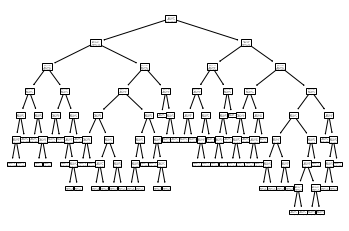

In [84]:
plot_tree(modelo)

usando axis para melhorar o plot

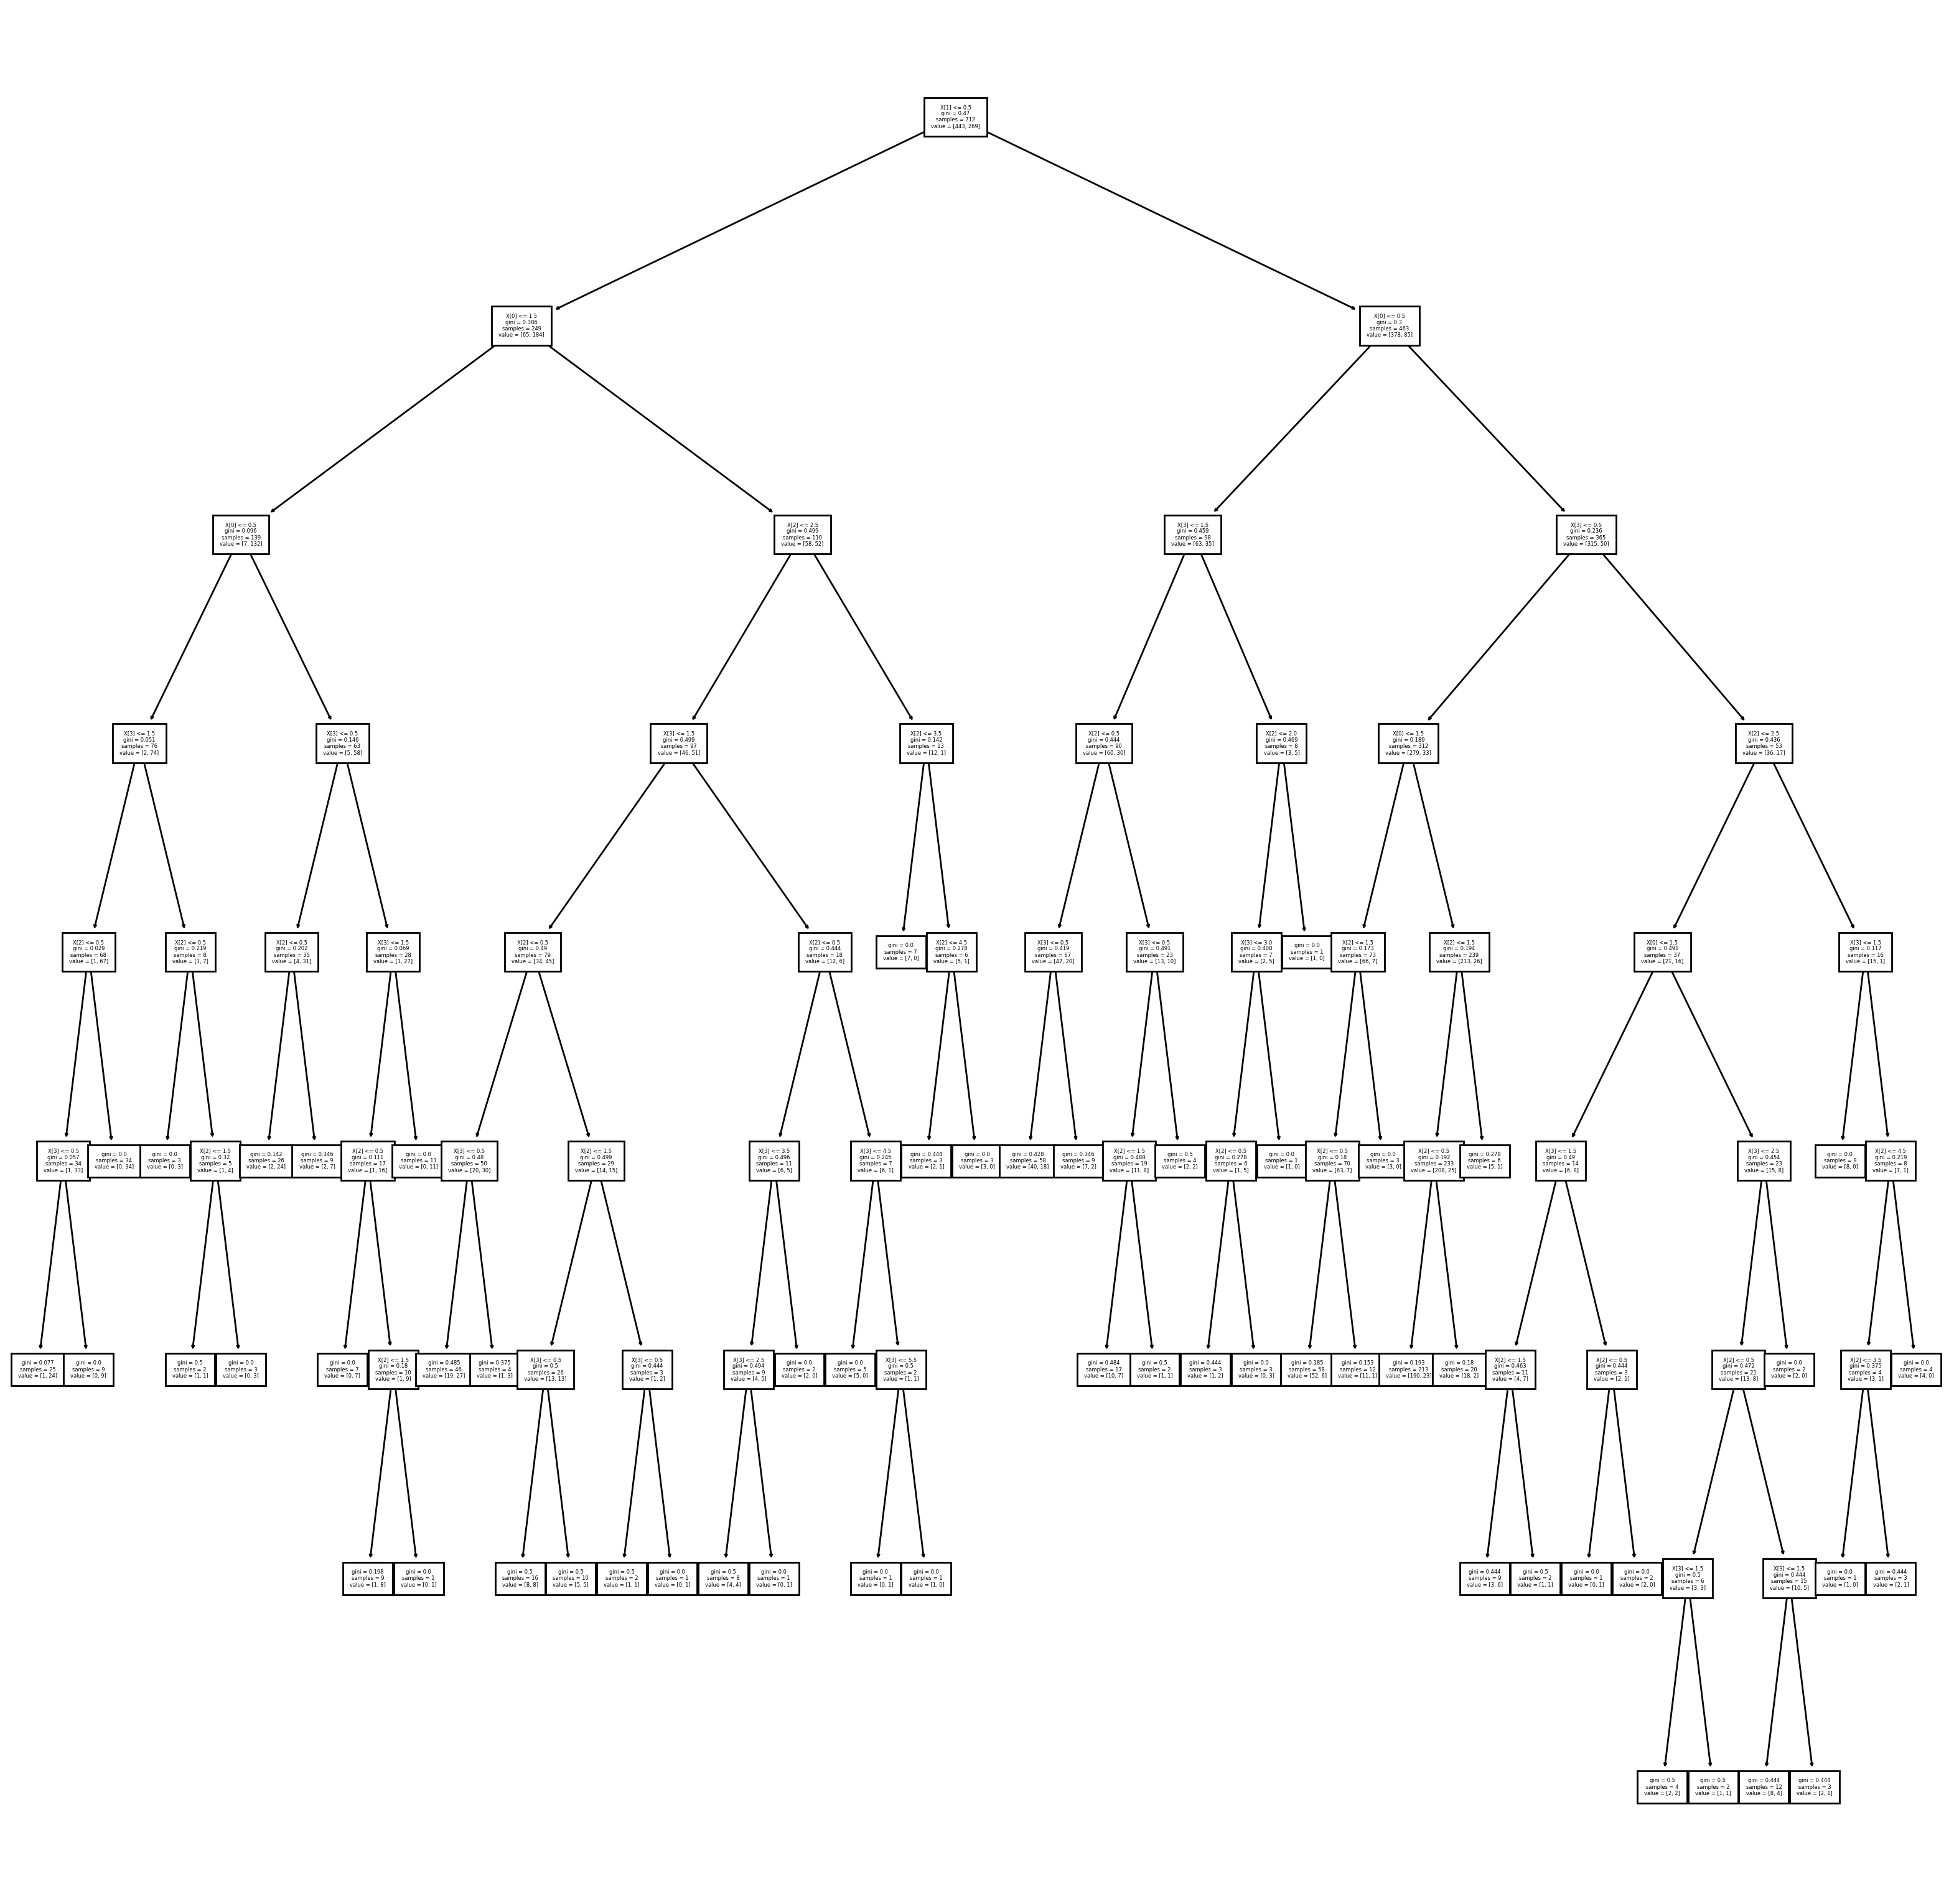

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (20, 20), dpi = 200)

plot_tree(modelo, fontsize = 3, ax = ax)

plt.show()

In [108]:
df = pd.read_csv('dados/titanic.csv')

var_expl = ['Pclass', 'Sex', 'SibSp', 'Parch']
var_resp = 'Survived'

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl].copy()
x_teste = df_teste[var_expl].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

In [109]:
# uma outra forma de corrigir o problema do Sex => male/female
oe = OrdinalEncoder()
x_treino[var_expl] = oe.fit_transform(x_treino[var_expl])
x_teste[var_expl] = oe.transform(x_teste[var_expl])

In [133]:
modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict_proba(x_teste)[:, 1]

roc_auc_score(y_teste, y_teste_pred)

0.833096407340398

Index(['Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')

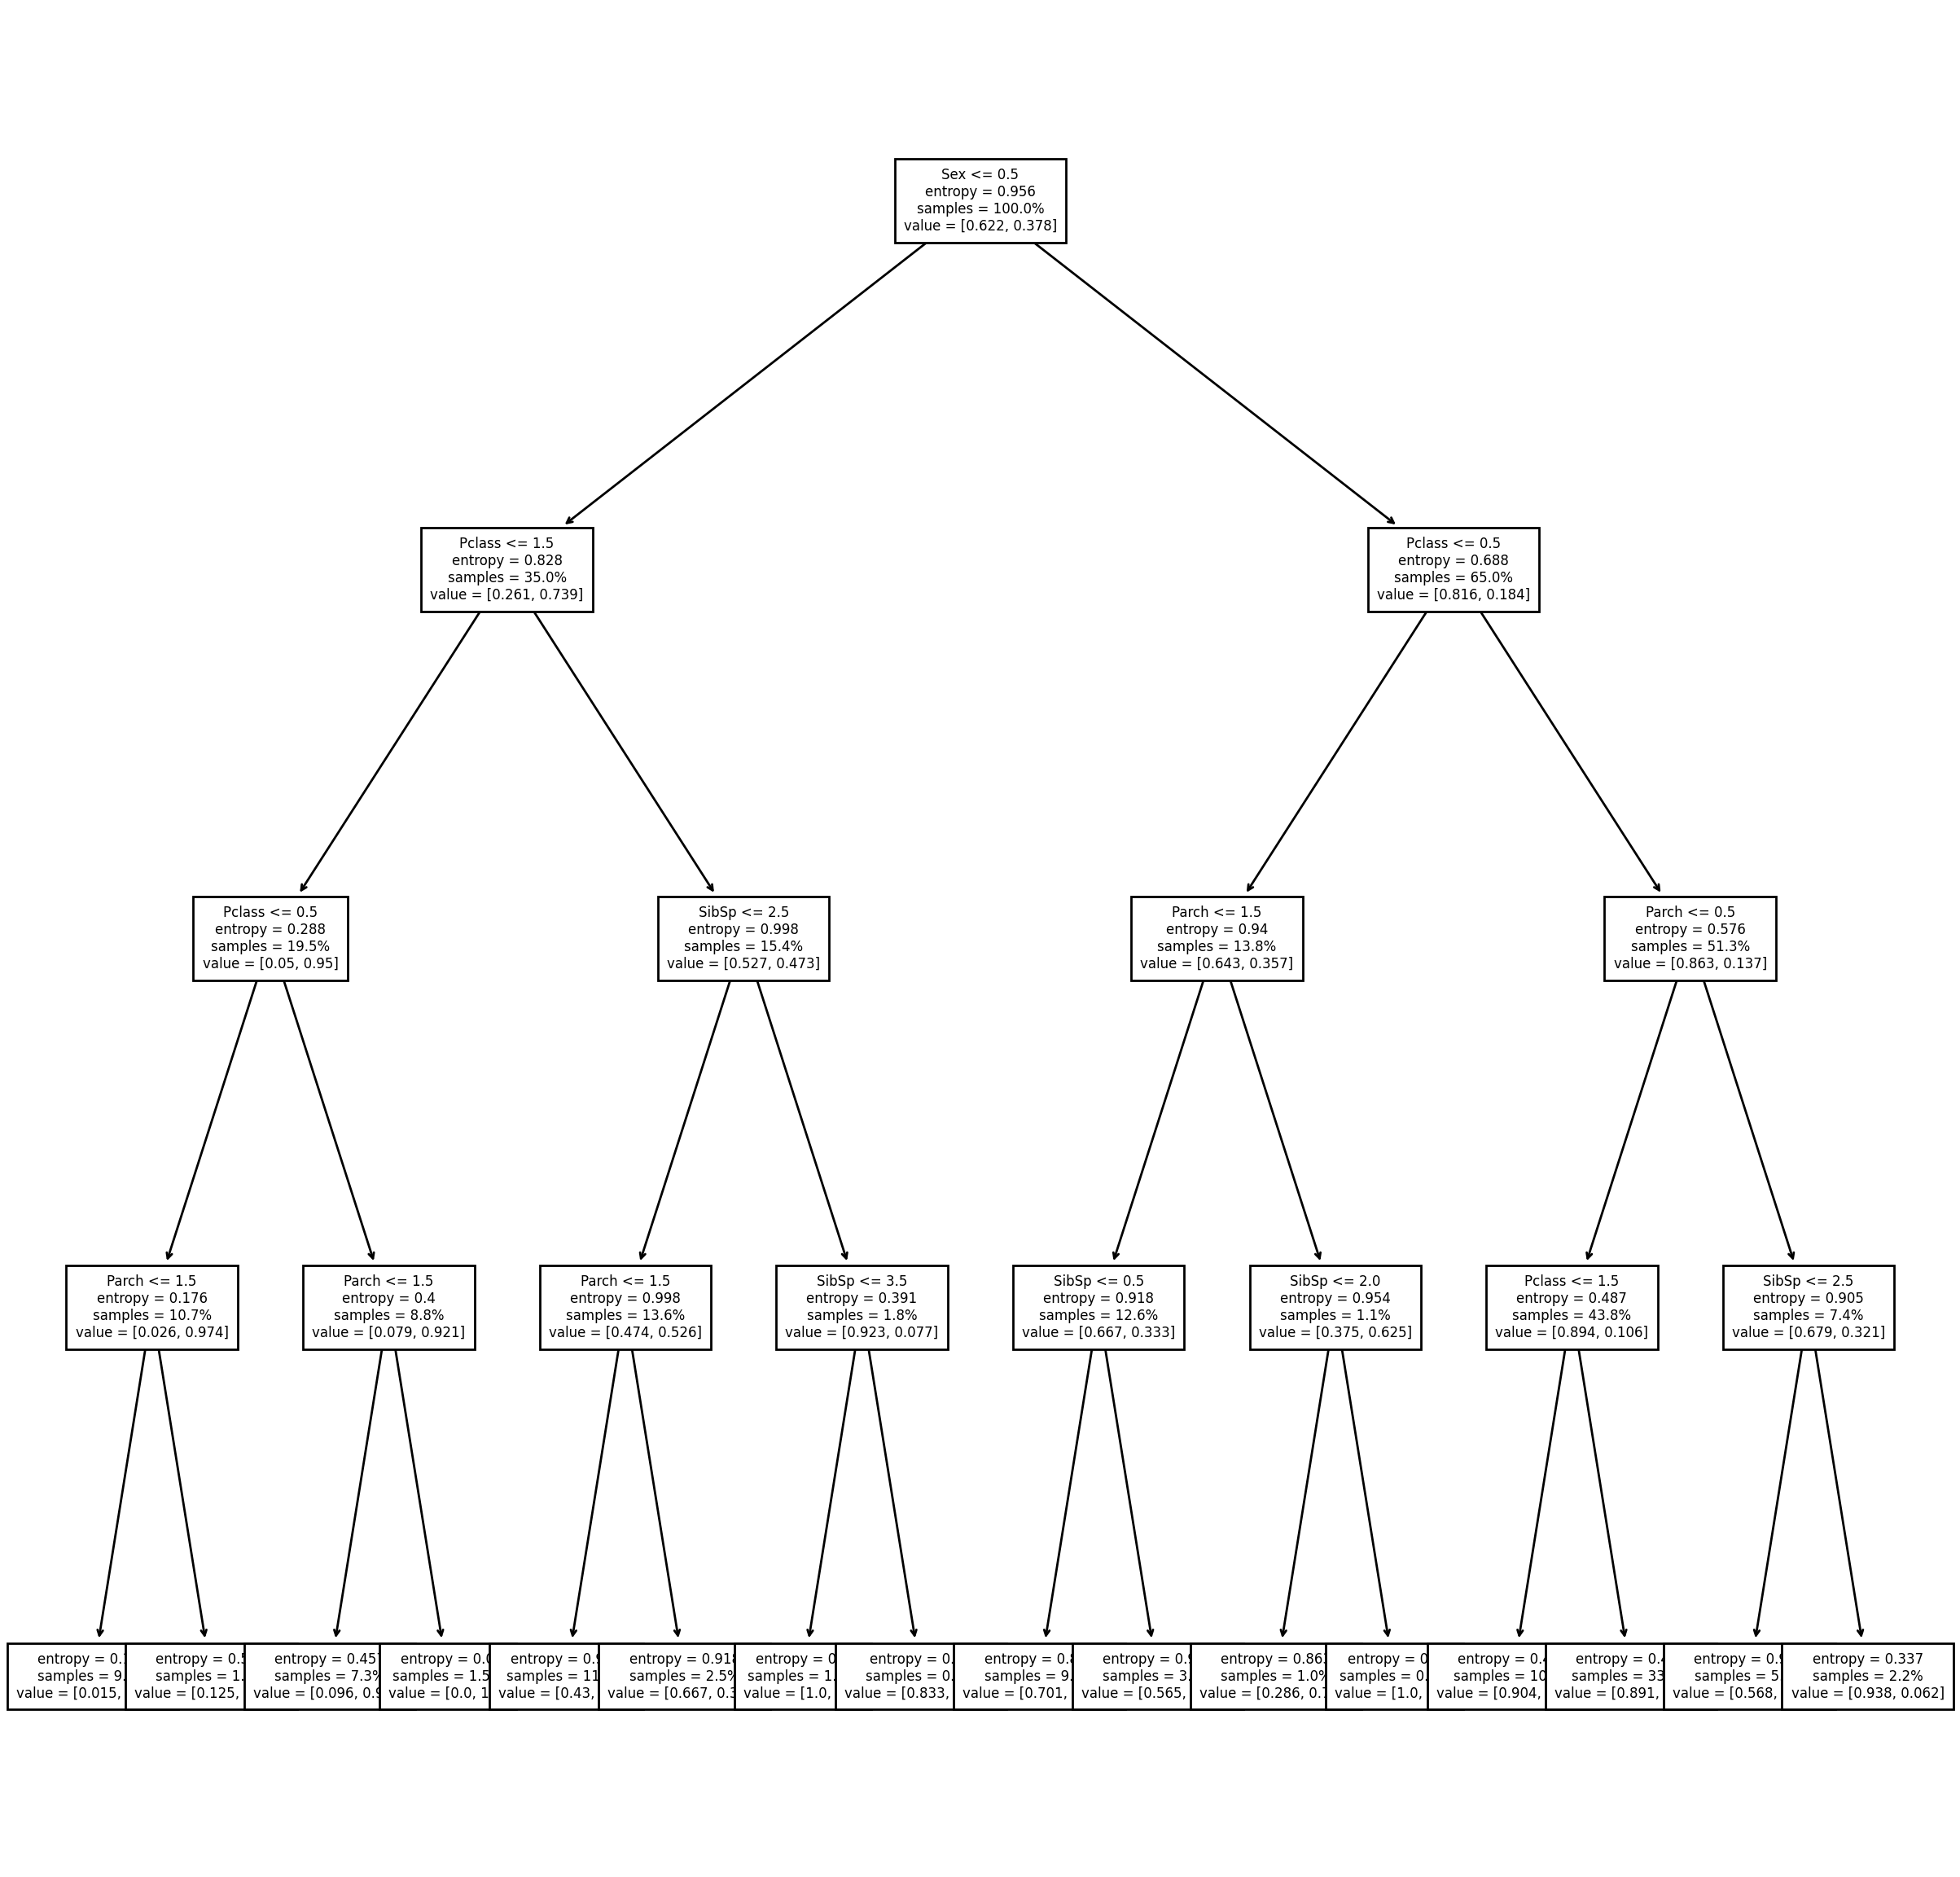

In [138]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi = 200)

plot_tree(modelo, fontsize = 6, ax = ax, feature_names = x_treino.columns, proportion = True)

plt.show()

### Usos da árvore além de modelos

**Criar categorizações:** construa uma árvore de uma feauture contínua e profundidade baixa (1 ou 2), em seguida visualize essa árvore. O que você consegue concluir?

**Fazer seleção de feature:** construa uma árvore com todas as features disponíveis, porém com profundidade de até 3 ou 4, em seguida visualize essa árvore. Todas as features aparecem nessa árvore?
